# 24-hour average PM2.5 concentration for MT Fall

In [2]:
# Use pandas dataframes for datastructure
import pandas as pd
# matplotlib for graphing 
import matplotlib.pyplot as plt

In [3]:
# Read csv into DataFrame
src_csv = '../../source_data/fallPM2_5_mt.csv'
df = pd.read_csv(src_csv, parse_dates=True, index_col='Date')
df.columns.name = 'Site'

In [4]:
# DataFrame info
df.head()

Site,Eureka,Lake McDonald,Quartz Creek,Trout Creek,Arlee,Superior,Rock Creek,Condon,Alberton,Drummond,...,Potomac,Heart Butte,Florence,Philipsburg,Lincoln,Cut Bank,White Sulphur Springs,Clearwater,Rainy Lake,Darby
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-01,3.083333,NaN,400.541667,NaN,35.2,399.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,54.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-02,6.666667,NaN,240.666667,NaN,NaN,240.7,NaN,NaN,30.7,NaN,...,NaN,NaN,39.666667,21.6,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-03,9.166667,NaN,156.583333,NaN,40.4,156.3,NaN,NaN,14.9,NaN,...,NaN,NaN,20.458333,8.8,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-04,37.958333,NaN,471.086957,NaN,70.6,NaN,NaN,NaN,34.8,NaN,...,NaN,NaN,38.583333,54.5,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-05,31.291667,NaN,198.333333,NaN,51.0,198.1,NaN,NaN,NaN,NaN,...,NaN,NaN,33.083333,21.8,NaN,NaN,NaN,14.0,NaN,NaN


In [46]:
df.columns

Index(['Eureka', 'Lake McDonald', 'Quartz Creek', 'Trout Creek', 'Arlee',
       'Superior', 'Rock Creek', 'Condon', 'Alberton', 'Drummond', 'Lolo',
       'Stevensville', 'Potomac', 'Heart Butte', 'Florence', 'Philipsburg',
       'Lincoln', 'Cut Bank', 'White Sulphur Springs', 'Clearwater',
       'Rainy Lake', 'Darby'],
      dtype='object', name='Site')

In [5]:
# Restack by site and date
new_stack = df.stack().swaplevel(0,1).sort_index()
new_stack = pd.DataFrame(new_stack)
new_stack.columns = ['pm2_5']
new_stack.head()

pm2_5
Site     Date             
Alberton 2017-08-02   30.7
         2017-08-03   14.9
         2017-08-04   34.8
         2017-08-06   13.0
         2017-08-07   16.0

,Site,Date,pm2_5
0,Florence,2017-08-02,39.666667
1,Florence,2017-08-03,20.458333
2,Florence,2017-08-04,38.583333
3,Florence,2017-08-05,33.083333
4,Florence,2017-08-06,26.541667


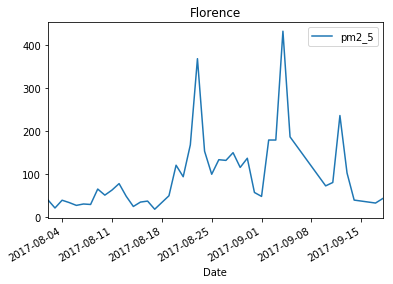

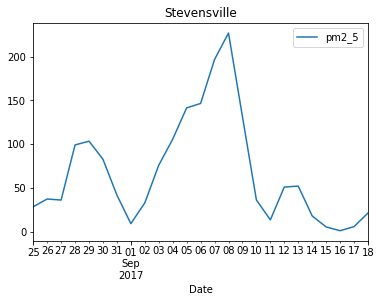

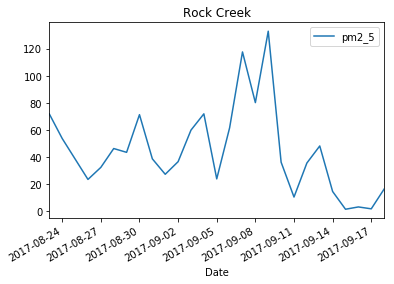

In [53]:
# Set up matplotlib for plotting in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt

def plot_trends(station):
    data = new_stack.loc[[station, 'Date'], :].reset_index()
    ax = data.plot(x="Date", y="pm2_5")
    ax.set_title(data['Site'][0])
    return ax  # not sure this needs to be here

# Plot trends for Florence weather station
stations = ['Florence', 'Stevensville', 'Rock Creek']
for station in stations:
    plot_trends(station)

Data Source:
Sarah Coefield, M.S., M.A.
Air Quality Specialist
Missoula City-County Health Department

"I’ve attached a spreadsheet DEQ sent me this fall with data from all of the monitors deployed around Montana this wildfire season.  The units are all ug/m3 and the data are all the 24-hour average PM2.5 concentration.  I do not have data into October.  DEQ may be able to provide that data (I’ve cc’d Stephen Coe at DEQ).   The data in the attached spreadsheet have not been QA-d, but should still give a good general impression of the wildfire smoke this year."

Information on Particle Pollution

https://airnow.gov/index.cfm?action=aqibasics.particle
![title](../img/pmwidthgraphic.jpg)